In [ ]:
!pip install python-docx
import pandas as pd
import nltk
import re
import docx
from textblob import TextBlob


In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d bittlingmayer/amazonreviews

!unzip amazonreviews.zip



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/bittlingmayer/amazonreviews
License(s): unknown
 99% 488M/493M [00:02<00:00, 231MB/s]
100% 493M/493M [00:02<00:00, 201MB/s]
Archive:  amazonreviews.zip
  inflating: test.ft.txt.bz2         
  inflating: train.ft.txt.bz2        


In [ ]:
import bz2

# Decompress a .bz2 file
with bz2.BZ2File("train.ft.txt.bz2", "rb") as file, open("file.txt", "wb") as output:
    output.write(file.read())


In [ ]:
file_path = "/content/train.ft.txt"
def extract_reviews(file_path):
  with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()
    reviews = re.findall(r'__label__\d+\s(.*?)(?=__label__\d+|$)', content, re.DOTALL)
    return [review.strip() for review in reviews]
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


file_path = "/content/train.ft.txt"
reviews = extract_reviews(file_path)


results = [(review, analyze_sentiment(review)) for review in reviews]

for review, sentiment in results:
    print(f"Review: {review}\nSentiment: {sentiment}\n")

Streaming output truncated to the last 5000 lines.
Sentiment: Positive

Review: A good adventure story: This book was enchanting as it has children living on their own without adults. We all think about what that would be like. Toughboy is 11 and he tries to act very grown up. Sister is younger and she really looks up to her brother. The book is full of adventure, but not scary. I wish I knew what happened next. My brother and I both read this book (he is 8 and I am 11) and we both liked it.
Sentiment: Positive

Review: Avoid this book: Imagine you're a First Nations student, and all the stories you ever read represent your people as dead, dying or drunk. When oh when are writers going to give their readers a few positive First Nations role models? There was no need for the mother to die in the first sentence of this novel, nor for the father to be a drunk. Let's use a little imagination, you writers! Why couldn't the scenario have the father in a positive role, perhaps teaching the ch

In [ ]:

df = pd.DataFrame(results, columns=["Review", "Sentiment"])

csv_path = "/content/reviews_sentiment.csv"
df.to_csv(csv_path, index=False, encoding="utf-8")

print(f"CSV file saved at: {csv_path}")


CSV file saved at: /content/reviews_sentiment.csv


In [ ]:
df.head()

,Review,Sentiment
0,Valuable Addition: The card was very easy to i...,Positive
1,You can get better: I was ready to bash this b...,Positive
2,One Step Closer to Mastering Excel: This is a ...,Positive
3,A great book for really getting into Excel: Mo...,Positive
4,Found what I needed first time digging: I was ...,Positive


In [ ]:
df.isnull().sum()

,0
Review,0
Sentiment,0


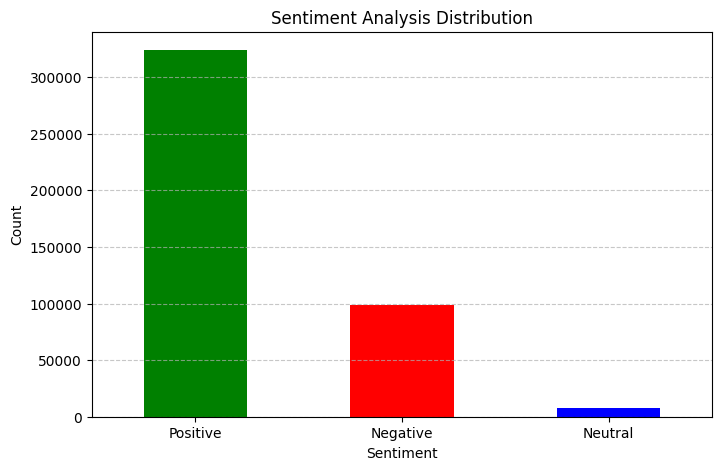

In [ ]:

import matplotlib.pyplot as plt

sentiment_counts = df["Sentiment"].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind="bar", color=["green", "red", "blue"])


plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Distribution")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [2]:
!git remote add origin https://github.com/Jyothiswaroopr/FUTURE_DS_01.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
